In [2]:
using RDatasets, Gadfly, Distributions;

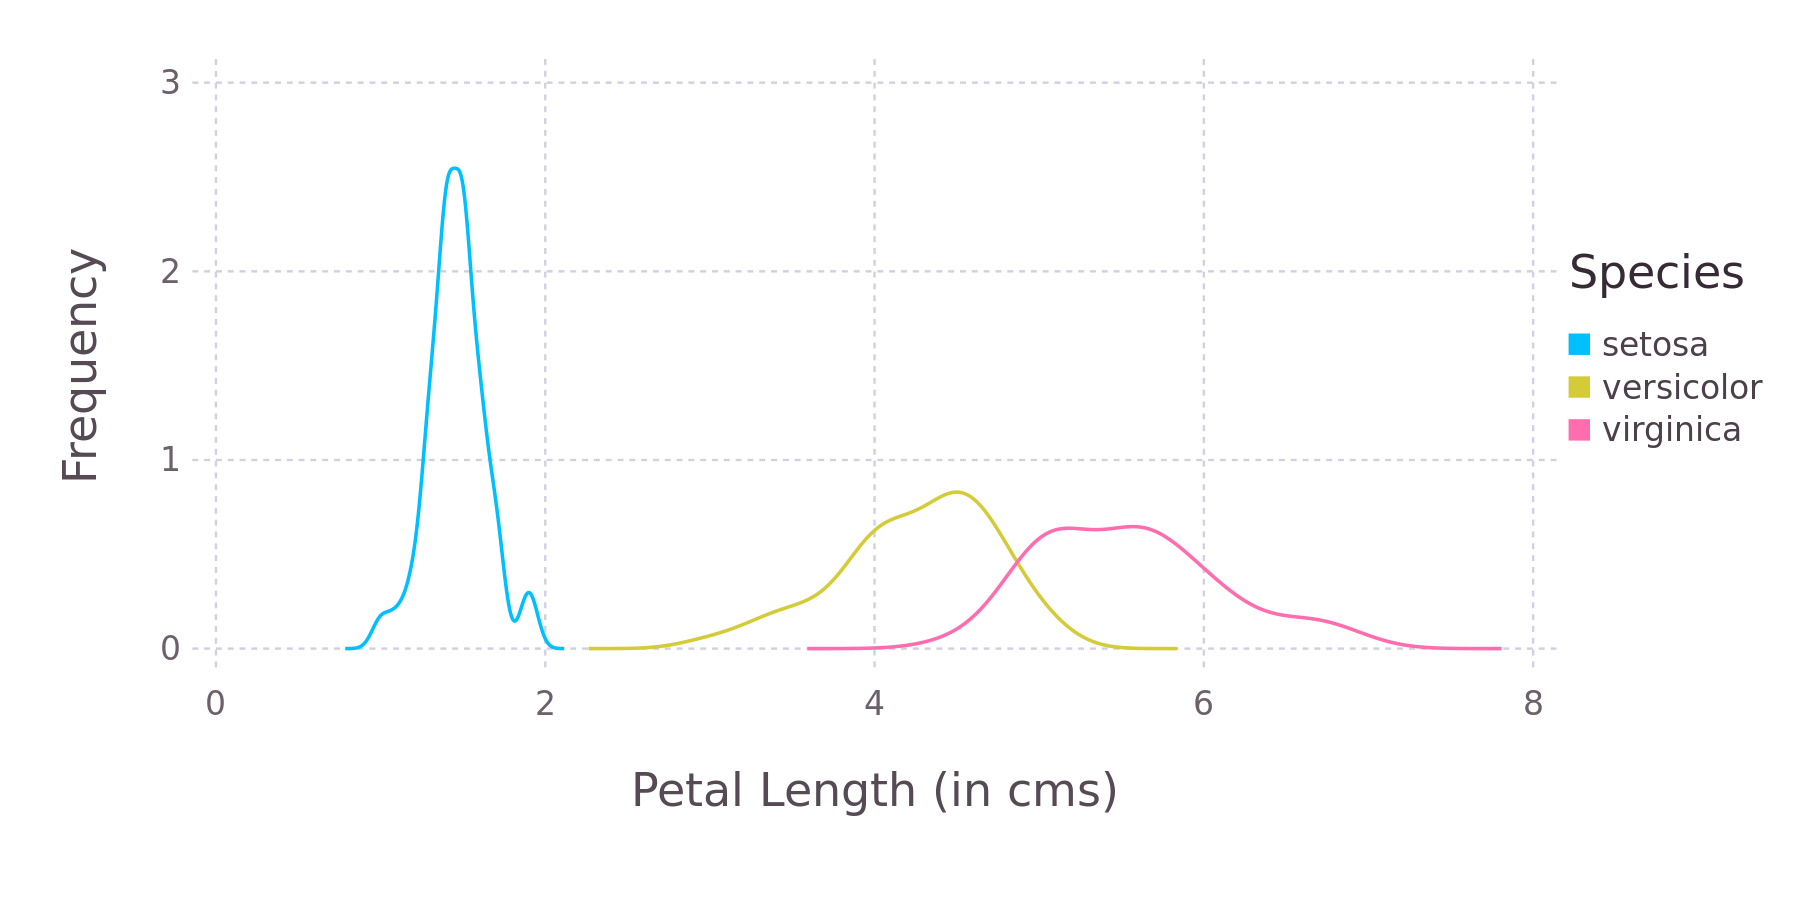

In [4]:
data = dataset("datasets", "iris");
myplot = plot(data, x=:PetalLength, color=:Species, Geom.density,
              Guide.xlabel("Petal Length (in cms)"),
              Guide.ylabel("Frequency"), major_label_font_size=18pt,
              minor_label_font_size=14pt,
              key_title_font_size= 18pt,
              major_label_color= colorant"black",
              minor_label_color= colorant"black",
              Coord.Cartesian(xmin=0, xmax=8));
draw(PNG(6inch, 3inch, dpi=300), myplot);

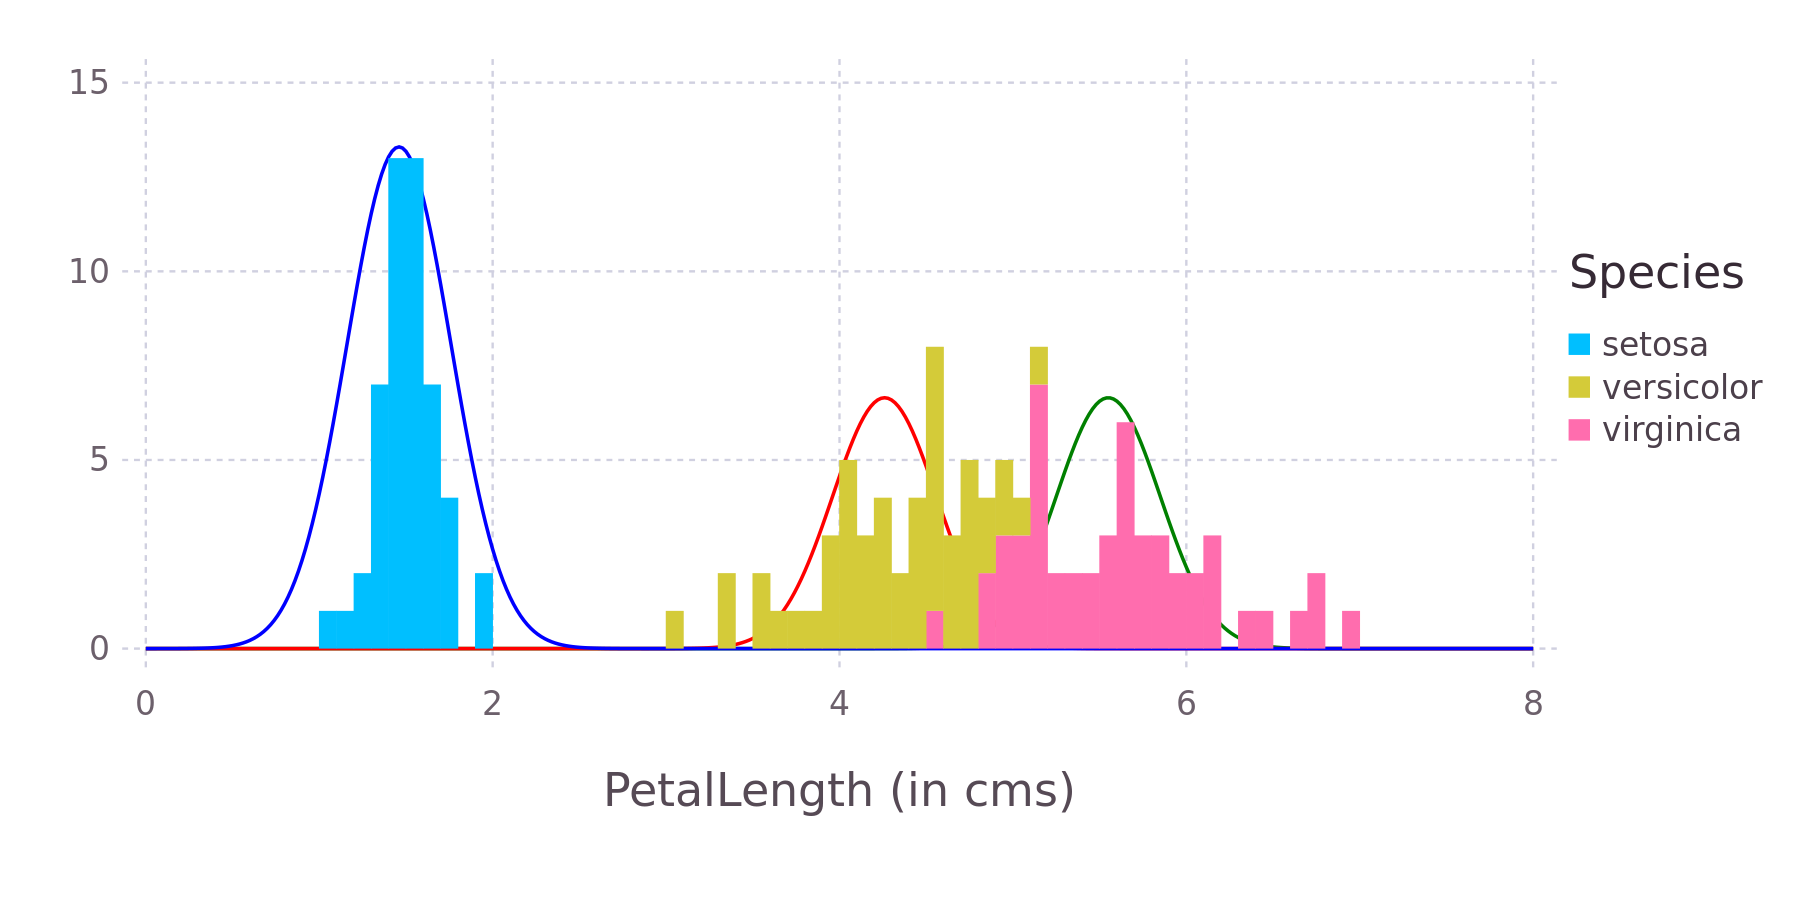

In [8]:
myplot = plot(layer(data,x=:PetalLength, color=:Species, Geom.histogram,
              Theme(default_color=colorant"purple")),
              layer(x=0:0.02:8,y=pdf.(Normal(1.46,0.3),0:0.02:8)*10,Geom.line,
              Theme(default_color=colorant"blue")),
              layer(x=0:0.02:8,y=pdf.(Normal(4.26,0.3),0:0.02:8)*5,Geom.line,
              Theme(default_color=colorant"red")),
              layer(x=0:0.02:8,y=pdf.(Normal(5.55,0.3),0:0.02:8)*5,Geom.line,
              Theme(default_color=colorant"green")),
              Guide.xlabel("PetalLength (in cms)"),Guide.ylabel(""), major_label_font_size=18pt,
              minor_label_font_size=14pt,
              key_title_font_size = 18pt,
              key_label_font_size = 14pt,
              major_label_color=colorant"black",
              minor_label_color=colorant"black",Coord.Cartesian(xmin=0, xmax=8));
draw(PNG(6inch, 3inch, dpi=300), myplot);

In [25]:
function E_step(x,mu_S,mu_V,mu_R,sigma,p_S, p_V, p_R)
    numerator1 = p_S*pdf.(Normal(mu_S,sigma),x);
    numerator2 = p_V*pdf.(Normal(mu_V,sigma),x);
    numerator3 = p_R*pdf.(Normal(mu_R,sigma),x);
    denom = numerator1 .+ numerator2 .+ numerator3;
    post_S = numerator1 ./denom;
    post_V = numerator2 ./denom;
    post_R = numerator3 ./denom;
    return post_S, post_V, post_R;
end

E_step (generic function with 1 method)

In [26]:
function M_step(x,post_S, post_V, post_R)
    mu_S = (post_S'*x)./sum(post_S);
    mu_V = (post_V'*x)./sum(post_V);
    mu_R = (post_R'*x)./sum(post_R);
    return mu_S, mu_V, mu_R;
end

M_step (generic function with 1 method)

In [27]:
function EM(x,mu_S,mu_V,mu_R,p_S, p_V, p_R,sigma)
    maxIter = 1000;
    for i=1:maxIter
        print(i,"\n");
        post_S, post_V, post_R = E_step(x,mu_S,mu_V,mu_R,sigma,p_S, p_V, p_R); #print(post_x,"\n");
        mu_S_new, mu_V_new, mu_R_new = M_step(x,post_S, post_V, post_R); #print(mu_S_new," ",mu_V_new,"\n");
        if(abs(mu_S-mu_S_new)<0.001 && abs(mu_V-mu_V_new)<0.001 && abs(mu_R-mu_R_new)<0.001)
            break;
        end;
        mu_S = mu_S_new;
        mu_V = mu_V_new;
        mu_R = mu_R_new;
    end
    return mu_S, mu_V, mu_R;
end

EM (generic function with 1 method)

In [32]:
data = dataset("datasets","iris");
x = data[:PetalLength];
mu_S=2;
mu_V=4;
mu_R=6;
p_S = 0.34;
p_V = 0.33;
p_R = 0.33;
sigma=0.54;
mu_S, mu_V, mu_R = EM(x,mu_S,mu_V,mu_R,p_S,p_V,p_R,sigma)

(1.4734824438108678, 4.358586005904997, 5.536474404469806)

1
2
3
4
5
6
7
8


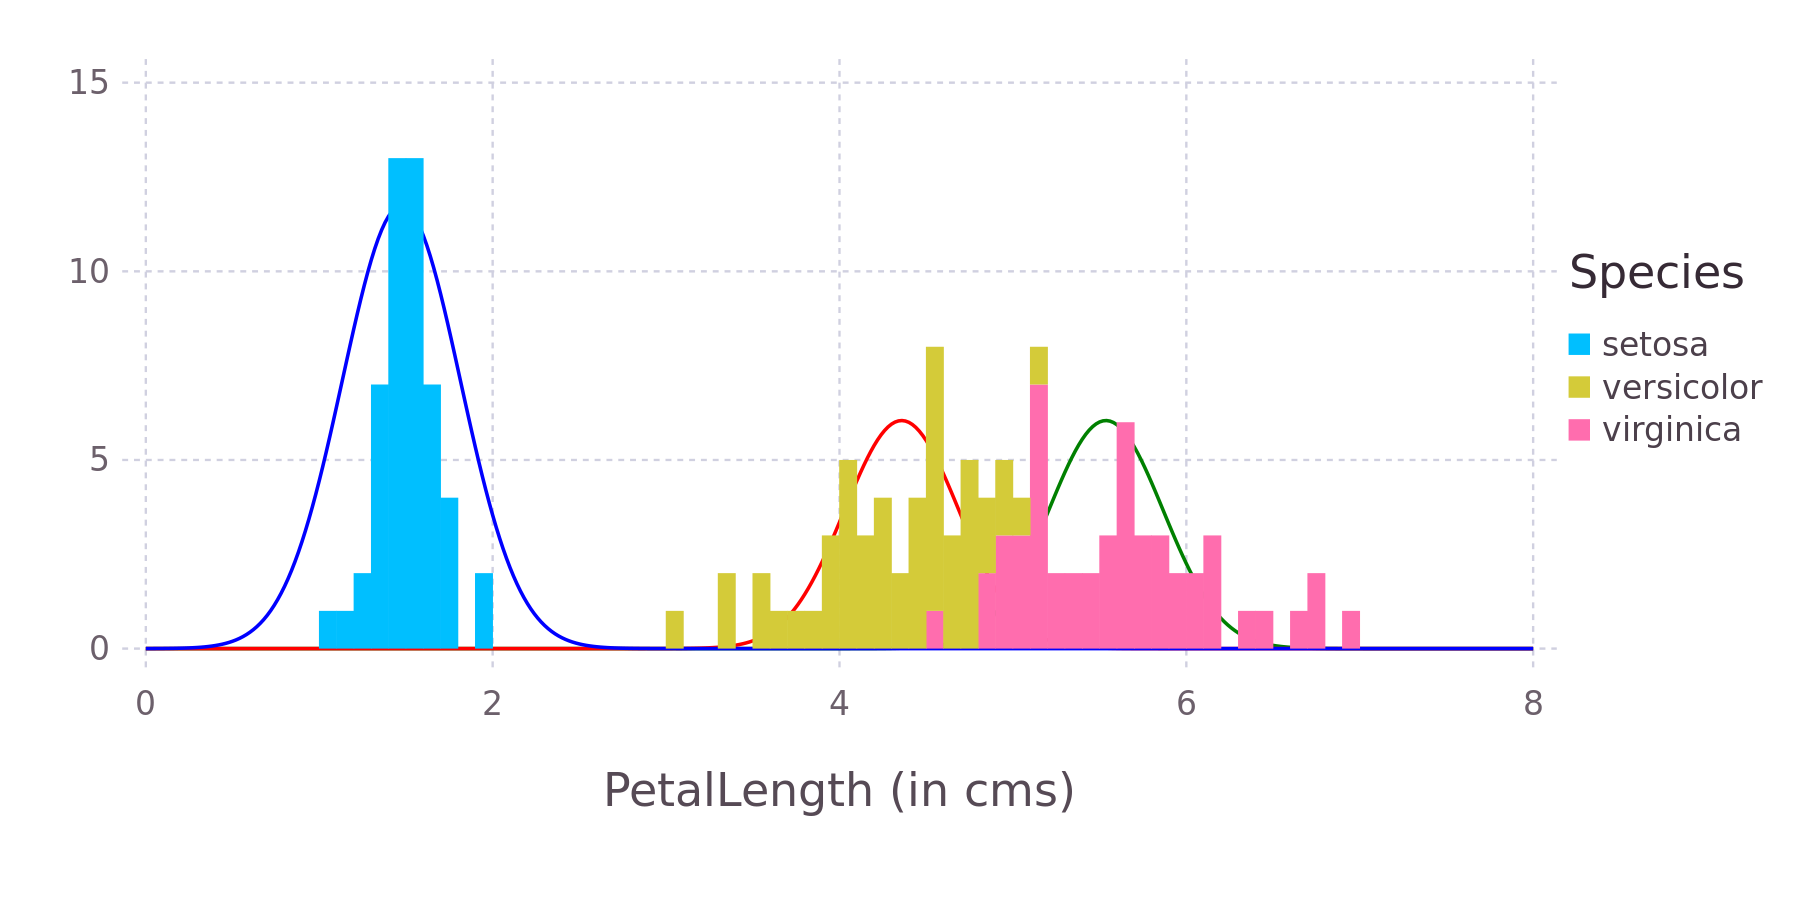

In [35]:
myplot = plot(layer(data,x=:PetalLength, color=:Species, Geom.histogram,
              Theme(default_color=colorant"purple")),
              layer(x=0:0.02:8,y=pdf.(Normal(mu_S,0.34),0:0.02:8)*10,Geom.line,
              Theme(default_color=colorant"blue")),
              layer(x=0:0.02:8,y=pdf.(Normal(mu_V,0.33),0:0.02:8)*5,Geom.line,
              Theme(default_color=colorant"red")),
              layer(x=0:0.02:8,y=pdf.(Normal(mu_R,0.33),0:0.02:8)*5,Geom.line,
              Theme(default_color=colorant"green")),
              Guide.xlabel("PetalLength (in cms)"),Guide.ylabel(""), major_label_font_size=18pt,
              minor_label_font_size=14pt,
              key_title_font_size = 18pt,
              key_label_font_size = 14pt,
              major_label_color=colorant"black",
              minor_label_color=colorant"black",Coord.Cartesian(xmin=0, xmax=8));
draw(PNG(6inch, 3inch, dpi=300), myplot);

In [1]:
function E_step(x,mu_S,mu_V,mu_R,sigma_S, sigma_V, sigma_R,p_S, p_V, p_R)
    numerator1 = p_S*pdf.(Normal(mu_S,sigma_S),x);
    numerator2 = p_V*pdf.(Normal(mu_V,sigma_V),x);
    numerator3 = p_R*pdf.(Normal(mu_R,sigma_R),x);
    denom = numerator1 .+ numerator2 .+ numerator3;
    post_S = numerator1 ./denom;
    post_V = numerator2 ./denom;
    post_R = numerator3 ./denom;
    return post_S, post_V, post_R;
end

E_step (generic function with 1 method)

In [19]:
function M_step(x,post_S, post_V, post_R, mu_S, mu_V, mu_R)
    sigma_S = ((post_S)'*(4*(x-mu_S)^2))./sum(post_S);
    sigma_V = ((post_V)'*(4*(x-mu_V)^2))./sum(post_V);
    sigma_R = ((post_R)'*(4*(x-mu_R)^2))./sum(post_R);
    return sigma_S, sigma_V, sigma_R;
end            

M_step (generic function with 1 method)

In [20]:
function EM(x,mu_S,mu_V,mu_R,p_S, p_V, p_R,sigma_S, sigma_V, sigma_R)
    maxIter = 1000;
    for i=1:maxIter
        print(i,"\n");
        post_S, post_V, post_R = E_step(x,mu_S,mu_V,mu_R,sigma_S, sigma_V, sigma_R,p_S, p_V, p_R); #print(post_x,"\n");
        sigma_S_new, sigma_V_new, sigma_R_new = M_step(x,post_S, post_V, post_R, mu_S, mu_V, mu_R); #print(mu_S_new," ",mu_V_new,"\n");
        if(abs(sigma_S-sigma_S_new)<0.001 && abs(sigma_V-sigma_V_new)<0.001 && abs(sigma_R-sigma_R_new)<0.001)
            break;
        end
        sigma_S = sigma_S_new;
        sigma_V = sigma_V_new;
        sigma_R = sigma_R_new;
    end
    return sigma_S, sigma_V, sigma_R;
end

EM (generic function with 1 method)

In [21]:
using RDatasets, Gadfly, Distributions;
data = dataset("datasets","iris");
x = data[:PetalLength];
mu_S=1.473;
mu_V=4.358;
mu_R=5.536;
p_S = 0.34;
p_V = 0.33;
p_R = 0.33;
sigma_S=0.54;
sigma_V=0.54;
sigma_R=0.54;
sigma_S, sigma_V, sigma_R = EM(x,mu_S,mu_V,mu_R,p_S, p_V, p_R,sigma_S, sigma_V, sigma_R)

LoadError: [91mDimensionMismatch("Cannot multiply two vectors")[39m

1
